## Introduction to Scikit-Learn (sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we are going to cover :

0. An end-to-and Scikit-Learn workflow
1. Getting the data ready
2. Choose the  right  estimatior/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn Workflow

In [78]:
# 1. Get the data ready
import pandas as pd
import numpy  as np

heard_disease = pd.read_csv("../HeardDisease/heart-disease.csv")

In [79]:
heard_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [80]:
# Create X  (Features matrix)
X = heard_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [81]:
#Create y (labels)
y = heard_disease["target"]
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

In [82]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [83]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [84]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
# make a prediciton

#y_label = clf.predict(np.array([0, 2, 4, 6]))

In [86]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [87]:
y_test

213    0
140    1
15     1
202    0
88     1
      ..
124    1
173    0
209    0
154    1
248    0
Name: target, Length: 61, dtype: int64

In [88]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [89]:
clf.score(X_test, y_test)

0.7868852459016393

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [91]:
confusion_matrix(y_test,y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [92]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [93]:
# 5. Improve Model
# Train different amount of n_estimatiors
np.random.seed(42)

for i in range (10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators= i ).fit(X_train,y_train)
    print(f"Model accuracy on test set :  {clf.score(X_test, y_test) * 100:.2f} %")

Trying model with 10 estimators...
Model accuracy on test set :  80.33 %
Trying model with 20 estimators...
Model accuracy on test set :  83.61 %
Trying model with 30 estimators...
Model accuracy on test set :  83.61 %
Trying model with 40 estimators...
Model accuracy on test set :  77.05 %
Trying model with 50 estimators...
Model accuracy on test set :  80.33 %
Trying model with 60 estimators...
Model accuracy on test set :  80.33 %
Trying model with 70 estimators...
Model accuracy on test set :  80.33 %
Trying model with 80 estimators...
Model accuracy on test set :  78.69 %
Trying model with 90 estimators...
Model accuracy on test set :  78.69 %


In [94]:
# 6. Save the model and load it
import pickle
pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [95]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test,y_test)

0.7868852459016393

In [96]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

    There main things we have to do :
        1. Split the data into features and labels (Usually "X" and "y")
        2. Filling (also called imputing ) or disregarding missing values
        3. Converting non-numerical values to numerical values (also called feature encoding )

In [97]:
heard_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
X =  heard_disease.drop("target", axis= 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [99]:
y = heard_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle= False)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [102]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [103]:
# Split data X and y
X = car_sales.drop("Price", axis=1)
y= car_sales["Price"]

In [104]:
# Spilit into Train and Test set
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [105]:
# Build Machine Learning Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(X_train,y_train)

In [106]:
# Turn the categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                  one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [107]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [108]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [109]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [110]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [111]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values ?

1. Fill them with some value (also know as imputation).
2. Remove the samples with missing data altogether.

In [113]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


In [114]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [115]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [116]:
# Let's try and convert our data to numbers
# Turn the categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                  one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X 

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option1: Fill missing data with pandas

In [117]:
# Fill the "Make" Column
car_sales_missing["Make"].fillna("missing", inplace=True)
# Fill the "Color" Column
car_sales_missing["Colour"].fillna("missing", inplace=True)
# Fill the "Odometer (KM)" Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
# Fill the "Doors" Column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [118]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [119]:
# Remove rows with missing Price Value
car_sales_missing.dropna(inplace=True)

In [120]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [121]:
len(car_sales_missing)

950

In [122]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [123]:
# Let's try and convert our data to numbers
# Turn the categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                  one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [124]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [125]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [126]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [127]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]
X.head(), y.head()

(     Make Colour  Odometer (KM)  Doors
 0   Honda  White        35431.0    4.0
 1     BMW   Blue       192714.0    5.0
 2   Honda  White        84714.0    4.0
 3  Toyota  White       154365.0    4.0
 4  Nissan   Blue       181577.0    3.0,
 0    15323.0
 1    19943.0
 2    28343.0
 3    13434.0
 4    14043.0
 Name: Price, dtype: float64)

In [128]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing " & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [129]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [130]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [131]:
# Let's try and convert our data to numbers
# Turn the categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                  one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X 

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [132]:
# Now we have got our data as number and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(transformed_X, y, train_size=0.8)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for your problem

Some Things to note:

* Skitlearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease pr not)
    * Sometimes you will see "clf" (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)    

## 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset

In [133]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [134]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [135]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [136]:
# Import algorithm
from sklearn import linear_model
# Setup random seed
np.random.seed(42)

# Create the data

X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = linear_model.Ridge(alpha=.5)
model.fit(X_train, y_train)

# Check skore of the model (on the test set)

model.score(X_test, y_test)


0.5758213996714423

What if "Ridge" didn't work or the score didn't fit our needs?

Well, we could always try a different model.

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

In [137]:
# Import the randomforestregressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check skore of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

In [138]:
heard_disease = pd.read_csv("heart-disease.csv")
heard_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [139]:
len(heard_disease)

303

In [140]:
# Import  the LİnearSVC estimator class
from sklearn.svm import LinearSVC

clf_model = LinearSVC(max_iter=10000)

# Setup random seed
np.random.seed(42)

# Create the data
X = heard_disease.drop("target", axis=1)
y = heard_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_model.fit(X_train, y_train)

clf_model.score(X_test, y_test)

c:\Users\necat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\necat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [141]:
# Import  the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
model = RandomForestClassifier()

# Setup random seed
np.random.seed(42)

# Create the data
X = heard_disease.drop("target", axis=1)
y = heard_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8524590163934426

 Notes:
1. If you have structured data, used ensemble methods
2. if you have unstructured data, use deep learning or transfer learning

In [142]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Make predictions using a machine learning model

2 ways to make predictions :
1. predict()
2. predict_proba()

In [143]:
# Use a trained model to make predictions
model.predict(np.array([20, 1, 2, 130, 145, 233, 0, 0, 187, 1, 2.3, 0, 0]))

c:\Users\necat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 20.    1.    2.  130.  145.  233.    0.    0.  187.    1.    2.3   0.
   0. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.shape

(61, 13)

In [ ]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
# Compare predictions to truth labels to evaluate the model

y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [ ]:
# Make predictions with predict_proba()
y_preds_prob = model.predict_proba(X_test)
y_preds_prob[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
y_preds[:5]

array([0, 1, 1, 0, 1], dtype=int64)

predict() can also be used for regression models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create Data
X = housing_df.drop("target", axis=1)
y= housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

#Model 
model = RandomForestRegressor()

model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluating a Machine Learning model

Three ways to evaluate Sckit-Learn models/estimators:
1. Estimator's built-in "score()" method
2. The "scoring" parameter
3. Problem-specific metric functions


In [ ]:
# Evaluating a model with the score() method
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create a data
data = pd.read_csv("heart-disease.csv")

X = data.drop("target", axis=1)
y = data["target"]

# Split data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a model
model = RandomForestClassifier()

# Fit  classifier to training data
model.fit(X_train, y_train)



RandomForestClassifier()

In [ ]:
# The highest value for .score() method is 1.0, the lowest is 0.0
model.score(X_test, y_test)

0.8524590163934426

In [ ]:
# Use score methods regression problem
# Evaluating a model with the score() method
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create a data
data = pd.read_csv("heart-disease.csv")

X = data.drop("target", axis=1)
y = data["target"]

# Split data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a model
model = RandomForestRegressor()

# Fit  classifier to training data
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# The default score() evaluation metric is r_squared for regression algorithms
# The highest value for .score() method is 1.0, the lowest is 0.0
model.score(X_test, y_test)

0.5106393318965518

In [ ]:
# Evaluating a model using the scoring parameter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create a data
data = pd.read_csv("heart-disease.csv")

X = data.drop("target", axis=1)
y = data["target"]

# Split data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a model
model = RandomForestClassifier()

# Fit  classifier to training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Single training and test split score
model_single_score = model.score(X_test, y_test)

In [ ]:
cross_val_score(model, X, y, cv=10)

array([0.87096774, 0.83870968, 0.87096774, 0.9       , 0.83333333,
       0.86666667, 0.73333333, 0.8       , 0.73333333, 0.8       ])

In [ ]:
# Take the mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=10))

# Compare single and 5-fold mean  cross-validation score
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248387096774193)

# Classification Model Evaluation Metric
1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification Report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create a data
data = pd.read_csv("heart-disease.csv")

X = data.drop("target", axis=1)
y = data["target"]

# Split data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a model
model = RandomForestClassifier()

cross_val_score = cross_val_score(model, X, y, cv = 5)

In [ ]:
np.mean(cross_val_score)

0.8215300546448088

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100 :.2f}%")

Heart Disease Classifier Accuracy: 82.15%


**Area under the reciever operating characteristic curve (AUC/ROC)**
* Area under the curve - AUC
* ROC curve

Roc curves are a comparision of a model's true positive (trp) versus a models false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [153]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_preds_prob = model.predict_proba(X_test)

In [154]:
y_preds_prob_positive = y_preds_prob[:,1]
y_preds_prob_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [155]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob_positive)

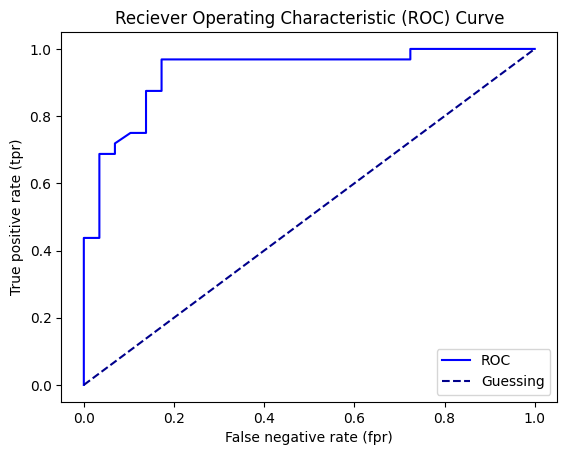

In [156]:
# Create a function for potting ROC curves
import matplotlib.pyplot as plt

# Plot Roc Curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "blue", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0, 1], color = "darkblue", linestyle = "--", label = "Guessing") 

    # Customize the plot
    plt.xlabel("False negative rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()  


plot_roc_curve(fpr, tpr) 

In [157]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds_prob_positive)

0.9304956896551724

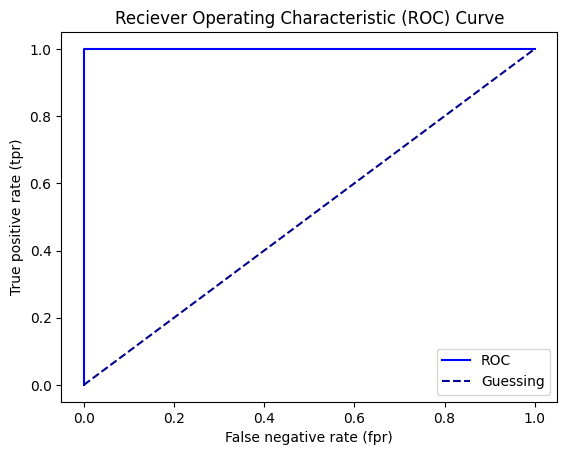

In [159]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)